# Модулятор 
# Single Sideband Suppressed Carrier 
# (AM-SSB-SC)

## 1. Введение

Одним из недостатков методов обычной амплитудной модуляции является удвоение требуемой полосы передачи по сравнению с полосой информационного сообщения. Это удвоение излишне, так как спектр АМ-сигнала симметричен относительно частоты несущей, поэтому половина спектра уже несет в себе всю информацию о передаваемом сообщении.  Это можно увидеть на спектраграммах, представленных в DSB TC Transmitter и DSB SC Transmitter. Амплитудная модуляция, которая не приводит к увеличению полосы сигнала, называется однополосной модуляцией (SSB - Sibgle Side Band). Обычная модуляция по этой причине иногда называется модуляция с удвоенной полосой (DSB - Double Side Band). Рассмотрим устройство модулятора формирующего однополосный сигнал.


## 2. Однотональная модуляция

Начнем с простейшего случая однотональной модуляции, при котором информационное сообщение представляет из себя гармонический сигнал вида: 

$$m\left(t\right)=A_m \cos \left(2\pi f_m t\right),$$

где $A_m$ - амплитуда тона, $f_m$ - частота в герцах. 

Если мы просто смешаем это сообщение с несущей, то получим две гармоники на несущей частоте, хотя само сообщение состоит всего из одного тона. Это можно увидеть, если умножить сообщение на несущую и затем воспользоваться формулой произведения косинусов:

$$s_{\textrm{am}} \left(t\right)=A_m \cos \left(2\pi f_m t\right)\cdot A_c \cos \left(2\pi f_c t\right)=$$ 
$$=\frac{A_m A_c }{2}\left\lbrack \cos \left(2\pi \left(f_m +f_c \right)t\right)+\cos \left(2\pi \left(f_m -f_c \right)t\right)\right\rbrack \ldotp$$

Один из простейший способов формирования однополосного сигнала заключается в использовании полосового фильтра для удаления одной половины спектра. Схема передающего устройства имеет вид:

<img src="../../images/SSB_SC_Transmitter_1.png" width=500/>

Если удаляется верхняя половина, то сигнал называется Lower Side Band (LSB). В случае однотональной модуляции LSB сигнал будет иметь вид:

$$s_{\textrm{LSB}} \left(t\right)=\frac{A_m A_c }{2}\cos \left(2\pi \left(f_m -f_c \right)t\right)\ldotp$$

Если удаляется нижняя половина спектра, то сигнал называется Upper Side Band (USB). В случае однотональной модуляции USB сигнал будет иметь вид:

$$s_{\textrm{USB}} \left(t\right)=\frac{A_m A_c }{2}\cos \left(2\pi \left(f_m +f_c \right)t\right)\ldotp$$

Также заметим, что в модулированном сигнале в явном виде отсутстует гармоника на частоте несущей, поэтому такой сигнал также называют сигнал с подавленной несущей (Single Side Band Suppressed Carrier).

Ниже представлен скрипт для получения временной диаграммы одноплосного сигнала для случая однотональной модуляции. С помощью переменной modulation_method можно выбрать, полосовой фильтр, который сформирует USB или LSB сигнал:

<IPython.core.display.Javascript object>


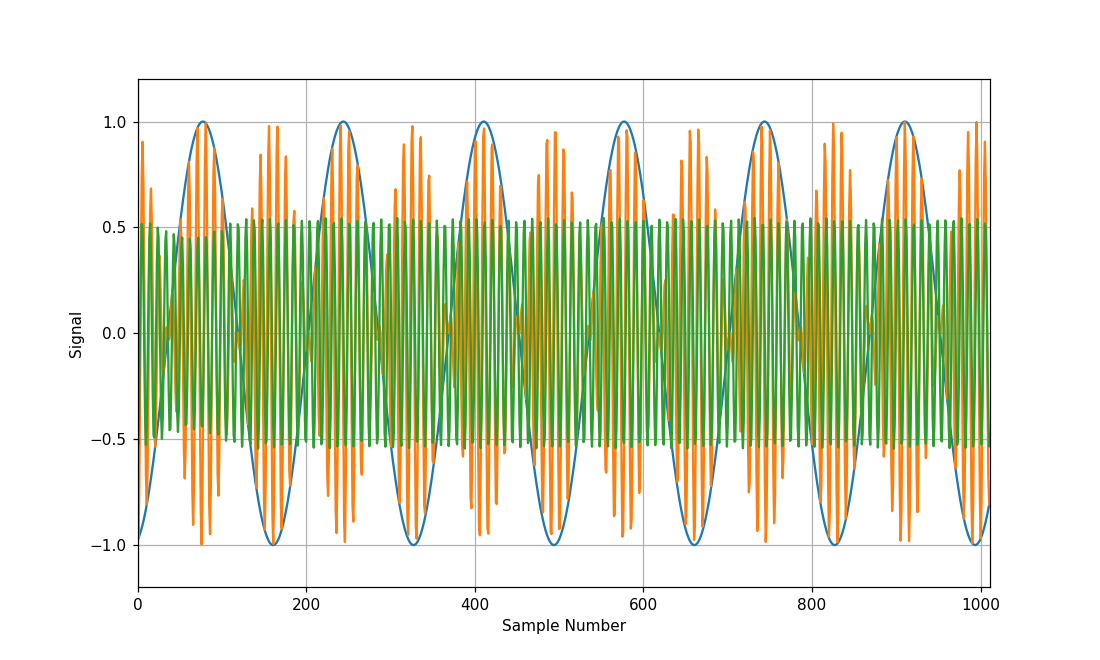

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import firls, lfilter

frame_size = 1011;   # размер обрабатываемой за один раз пачки данных
fs = 500e3;          # тактовая частота (Hz)

modulation_method = "USB"  # USB или LSB

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Signal')
ax.set_xlim(0, frame_size)
ax.set_ylim(-1.2, 1.2)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# отсчеты времени
t = np.linspace(0, frame_size/fs, frame_size) 

# формирование коэффициентов полосового фильтра
if modulation_method == "USB":
    H = firls(135, (0, 48000, 51000, 55000, 58500, fs/2), (0, 0, 1, 1, 0, 0), fs=fs)
else:
    H = firls(135, (0, 42000, 45000, 49000, 52000, fs/2), (0, 0, 1, 1, 0, 0), fs=fs)

FIR_tap_values = np.zeros(len(H) - 1) # внутреннее состояние ФНЧ    
    
# запуск симуляции
for _ in range(100):
 
    # информационное сообщение
    # частота тона: 3 kHz
    message = np.cos(2 * np.pi * 3e3 * t)
    
    # несущий сигнал
    # частота несущей: 50 kHz
    carrier = np.cos(2 * np.pi * 50e3 * t)
    
    # амплитудная модуляция
    dsb_am_signal = message * carrier
    
    # фильтрация для удаления второй полосы
    ssb_am_signal, FIR_tap_values = lfilter(H, 1.0, dsb_am_signal, zi=FIR_tap_values)

    # вывод результатов на график
    ax.lines[0].set_ydata(message)
    ax.lines[1].set_ydata(dsb_am_signal)
    ax.lines[2].set_ydata(ssb_am_signal)
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.05 секунды для лучшей визуализации
    time.sleep(0.05)

На временной диаграмме можно видеть гармонический сигнал, соответствующй информационному сообщению (синий). Оранжевым обозначен результат умножения сообщения на несущую. Этот сигнал соответствует обычной DSB модуляции. Зеленым цветом представлен сигнал после фильтрации полосовым фильтром. Так как модуляция однотональная, этот сигнал соответсвует синусоиде, частота которой равна $f_c -f_m$ для LSB или $f_c +f_m$ для USB.

Теперь рассмотрим, как эти преобразования выглядят в частотной области. Как упоминалось ранее, результат однотональной DSB модуляции равен сумме двух гармонических сигналов, частоты которых равны $f_m +f_c$ и $f_c -f_m$ Гц:

$$s_{\textrm{am}} \left(t\right)=\frac{A_m A_c }{2}\left\lbrack \cos \left(2\pi \left(f_m +f_c \right)t\right)+\cos \left(2\pi \left(f_c -f_m \right)t\right)\right\rbrack.$$

В частотной области это соответствует спектру:

$$s_{\textrm{am}} \left(t\right)\iff \frac{A_m A_c }{4}\left\lbrack \delta \left(f+f_c +f_m \right)+\delta \left(f+f_c -f_m \right)+\delta \left(f-f_c +f_m \right)+\delta \left(f-f_c -f_m \right)\right\rbrack.$$

Этот результат можно получить, если вспомнить, что спектр гармонического сигнала состоит из двух дельта-функций, и произведение сигналов во временной области соответствует их свертке в частотной.

Если использовать полосовой фильтр для удаления гармонки на частоте $f_m +f_c$, то мы получим LSB сигнал, спектр которого равен:

$$s_{\textrm{LSB}} \left(t\right)\iff \frac{A_m A_c }{4}\left\lbrack \delta \left(f+f_c -f_m \right)+\delta \left(f-f_c +f_m \right)\right\rbrack.$$

Аналогичные результаты получаем для  USB сигнала:

$$s_{\textrm{USB}} \left(t\right)\iff \frac{A_m A_c }{4}\left\lbrack \delta \left(f-f_c -f_m \right)+\delta \left(f+f_c +f_m \right)\right\rbrack.$$

Ниже представлен скрипт для получения спектра одноплосного сигнала для случая однотональной модуляции. С помощью переменной modulation_method можно выбрать, полосовой фильтр, который сформирует USB или LSB сигнал:

<IPython.core.display.Javascript object>


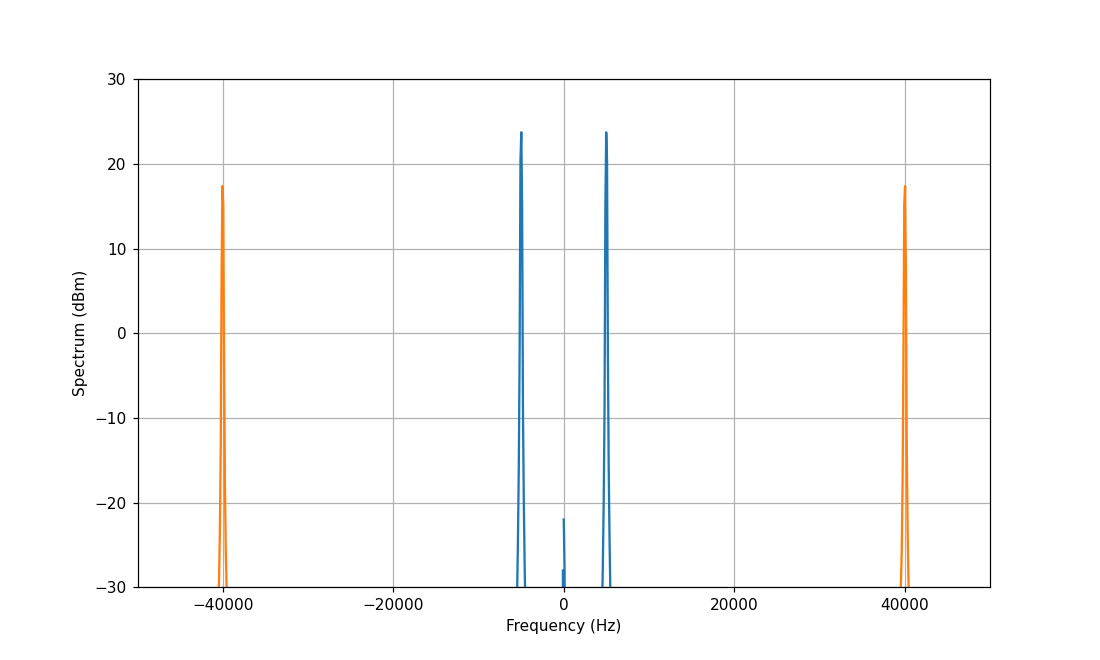

In [2]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.signal import welch, firls, lfilter

frame_size = 5000;   # размер обрабатываемой за один раз пачки данных
fs = 100e3;          # тактовая частота (Hz)

modulation_method = "USB"  # USB или LSB

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-fs/2, fs/2)
ax.set_ylim(-30, 30)
ax.grid(True)

# создаем три линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# постоеные осей графиков
t = np.linspace(0, frame_size/fs, frame_size) # отсчеты времени

# формирование коэффициентов полосового фильтра
if modulation_method == "USB":
    H = firls(175, (0, 33000, 35000, 45000, 47000, fs/2), (0, 0, 1, 1, 0, 0), fs=fs)
else:
    H = firls(175, (0, 23000, 25000, 35000, 37000, fs/2), (0, 0, 1, 1, 0, 0), fs=fs)

FIR_tap_values = np.zeros(len(H) - 1) # внутреннее состояние ФНЧ    

# запуск симуляции
for frame in range(100):

    # информационное сообщение
    # частота тона: 5 kHz
    message = np.cos(2 * np.pi * 5e3 * t)
    
    # несущий сигнал
    # частота несущей: 35 kHz
    carrier = np.cos(2 * np.pi * 35e3 * t)
    
    # амплитудная модуляция
    dsb_am_signal = message * carrier
    
    # фильтрация для удаления второй полосы
    ssb_am_signal, FIR_tap_values = lfilter(H, 1.0, dsb_am_signal, zi=FIR_tap_values)

    # посторение спектрограмм
    signals = message, ssb_am_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], fs, return_onesided=False, scaling='spectrum', nperseg=1024) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)

На графике представлен спектр информационного сообщения (синий) и спектр однополосного сигнала (оранжевый). Можно увидеть, что модулированный сигнал состоит из двух дельта-функций, что подтвеждает предыдущие рассуждения.

## 3. Однотональная модуляция с использованием преобразования Гильберта

Применение полосовых фильтров для удаление части спектра сопряжено с рядом сложностей. Во-первых, в зависимости от спектра информационного сообщения может потребоваться фильтр с очень узкой переходной полосой. Такой фильтр будет иметь много коэффициентов, что увеличивает вычислительные затраты на обработку сигнала.  Во-вторых, фильтрация выполняется на последнем этапе формирования сигнала на повышенной частоте дискретизации. В-третьих, при изменении частоты несущей коэффициенты фильтра также необходимо будет пересчитывать.

В связи с представленными выше недостатками, как правило, на практике однополосный сигнал формируется другим способом, основанным на преобразовании Гильберта. Рассмотрим из-за чего происходит удвоение полосы сигнала при обычной модуляции. Любой действительный сигнал имеет симметричный спектр относительно нулевой частоты. Как правило, спектр информационного сообщения распологается около нулевой частоты, поэтому такой сигнал называют Base Band. При умножении сообщения на гармонический сигнал его спектр переносится на частоту несущей. На эту частоту переносятся компоненты спектра сообщения как из положительной, так и из отрицательной области частот. Ширина спектра Base Band сигнала на положительных и отрицательных частотах совпадает, поэтому после переноса на несущую ширина спектра модулированного сигнала удваивается.

Удвоение спектра можно избежать, если удалить компоненты спектра сообщения на отрицательных частотах. Так как при этом спектра станет несимметричным, то сообщение будет комплексным. Такой сигнал называют аналитическим. Аналитический сигнал можно получить с помощью преобразования Гильберта, которое представляет из себя всепропускающий фильтр, изменяющий только фазу сигнала. Преобразование Гильберта формирует мнимую часть аналитического сигнала. Таким образом, можем записать:

$$m_A \left(t\right)=m\left(t\right)+j\cdot m_H \left(t\right),$$

где $m\left(t\right)$ - исходное информационное сообщение, $m_H \left(t\right)=H\left\lbrace m\left(t\right)\right\rbrace$ - преобразование Гильберта от сообщения, $m_A \left(t\right)$ - аналитический сигнал с односторонним спектром.

Аналитический сигнал далее можно перенести на несущую частоту с помощью умножения на комплексную экспоненту. В результате сигнал останется комплексным. Чтобы сделать его вещественным, оставим только его действительную часть. В результате получим USB сигнал, так как на несущую будут перенесены только положительные частоты. В виде формул данные преобразования можно записать так:

$$s_{\textrm{USB}} \left(t\right)=\textrm{Real}\left\lbrace m_A \left(t\right)\cdot e^{j\cdot 2\pi \cdot f_c \cdot t} \right\rbrace.$$

Структурная схема передатчика предсталена ниже:

<img src="../../images/SSB_SC_Transmitter_2.png" width=500/>

Если представить комплексную экспонету и аналитический сигнал как сумму действительной и мнимой части, то выражение для $s_{\textrm{USB}} \left(t\right)$ можно переписать в виде:

$$s_{\textrm{USB}} \left(t\right)=\textrm{Real}\left\lbrace \left(m\left(t\right)+j\cdot m_H \left(t\right),\right)\cdot \left(\cos \left(2\pi \cdot f_c \cdot t\right)+j\cdot \sin \left(2\pi \cdot f_c \cdot t\right)\right)\right\rbrace =$$

$$=\textrm{Real}\left\lbrace \left(m\left(t\right)\cdot \cos \left(2\pi \cdot f_c \cdot t\right)-m_H \left(t\right)\cdot \sin \left(2\pi \cdot f_c \cdot t\right)\right)+j\cdot \left(m_H \left(t\right)\cdot \cos \left(2\pi \cdot f_c \cdot t\right)+m\left(t\right)\cdot \sin \left(2\pi \cdot f_c \cdot t\right)\right)\right\rbrace =$$

$$=m\left(t\right)\cdot \cos \left(2\pi \cdot f_c \cdot t\right)-m_H \left(t\right)\cdot \sin \left(2\pi \cdot f_c \cdot t\right).$$

Таким образом, схему приемника можно также представить в виде:

<img src="../../images/SSB_SC_Transmitter_3.png" width=500/>

Если провести комплексное сопряжение аналитического сигнала, то получим сигнал, который содержит только отрицательные частоты. После переноса на несущую частоту и выделения действительной части получим LSB сигнал. То есть, имеем:

$$s_{\textrm{LSB}} \left(t\right)=\textrm{Real}\left\lbrace m_A^* \left(t\right)\cdot e^{j\cdot 2\pi \cdot f_c \cdot t} \right\rbrace.$$

Структурная схема передатчика предсталена ниже:

<img src="../../images/SSB_SC_Transmitter_4.png" width=500/>

Если представить комплексную экспонету и аналитический сигнал как сумму действительной и мнимой части, то выражение для $s_{\textrm{LSB}} \left(t\right)$ можно переписать в виде:

$$s_{\textrm{LSB}} \left(t\right)=m\left(t\right)\cdot \cos \left(2\pi \cdot f_c \cdot t\right)+m_H \left(t\right)\cdot \sin \left(2\pi \cdot f_c \cdot t\right).$$

Таким образом, схему приемника также можно представить в виде:

<img src="../../images/SSB_SC_Transmitter_5.png" width=500/>

Рассмотрим данный метод формирования однополосного сигнала для случая однотональной модуляции. Информационное сообщение представляет из себя гармонический сигнал вида:

$$m\left(t\right)=A_m \cos \left(2\pi f_m t\right),$$

где $A_m$ - амплитуда тона, $f_m$ - частота в герцах.

Преобразование Гильберта от косинуса равно синусу той же частоты. Значит можем записать:

$$m_H \left(t\right)=A_m \sin \left(2\pi f_m t\right)\ldotp$$

Таким образом, аналитичечкий сигнал можно представить в виде:

$$m_A \left(t\right)=m\left(t\right)+j\cdot m_H \left(t\right)=A_m \cos \left(2\pi f_m t\right)+j\cdot A_m \sin \left(2\pi f_m t\right)=A_m \cdot e^{j\cdot 2\pi \cdot f_m \cdot t} \ldotp$$

После переноса на несущую частоту с помощью умножения на комплексную экспоненту и взятия действительной части получим:

$$s_{\textrm{USB}} \left(t\right)=\textrm{Real}\left\lbrace A_m \cdot e^{j\cdot 2\pi \cdot f_m \cdot t} \cdot e^{j\cdot 2\pi \cdot f_c \cdot t} \right\rbrace =\textrm{Real}\left\lbrace A_m \cdot e^{j\cdot 2\pi \cdot \left(f_m +f_c \right)\cdot t} \right\rbrace =A_m \cos \left(2\pi \left(f_c +f_m \right)t\right)\ldotp$$

Как и ожидалось, USB сигнал для однотонального случая состоит из единственного тона на частоте $f_c +f_m$.

Чтобы получить LSB сигнал, необходиму дополнительно произвести комплексное сопряжение аналитического сигнала. В связи с этим можем записать:

$$m_A^* \left(t\right)=A_m \cdot e^{-j\cdot 2\pi \cdot f_m \cdot t} \ldotp$$

$$s_{\textrm{LSB}} \left(t\right)=\textrm{Real}\left\lbrace A_m \cdot e^{-j\cdot 2\pi \cdot f_m \cdot t} \cdot e^{j\cdot 2\pi \cdot f_c \cdot t} \right\rbrace =\textrm{Real}\left\lbrace A_m \cdot e^{j\cdot 2\pi \cdot \left(f_c -f_m \right)\cdot t} \right\rbrace =A_m \cos \left(2\pi \left(f_c -f_m \right)t\right)\ldotp$$

То есть, LSB сигнал для однотонального случая состоит из единственного тона на частоте $f_c -f_m$. 

Ниже представлен скрипт для получения спектра одноплосного сигнала с помощью преобразования Гильберта для случая однотональной модуляции. С помощью переменной modulation_method можно выбрать метод модуляции: USB или LSB:

<IPython.core.display.Javascript object>


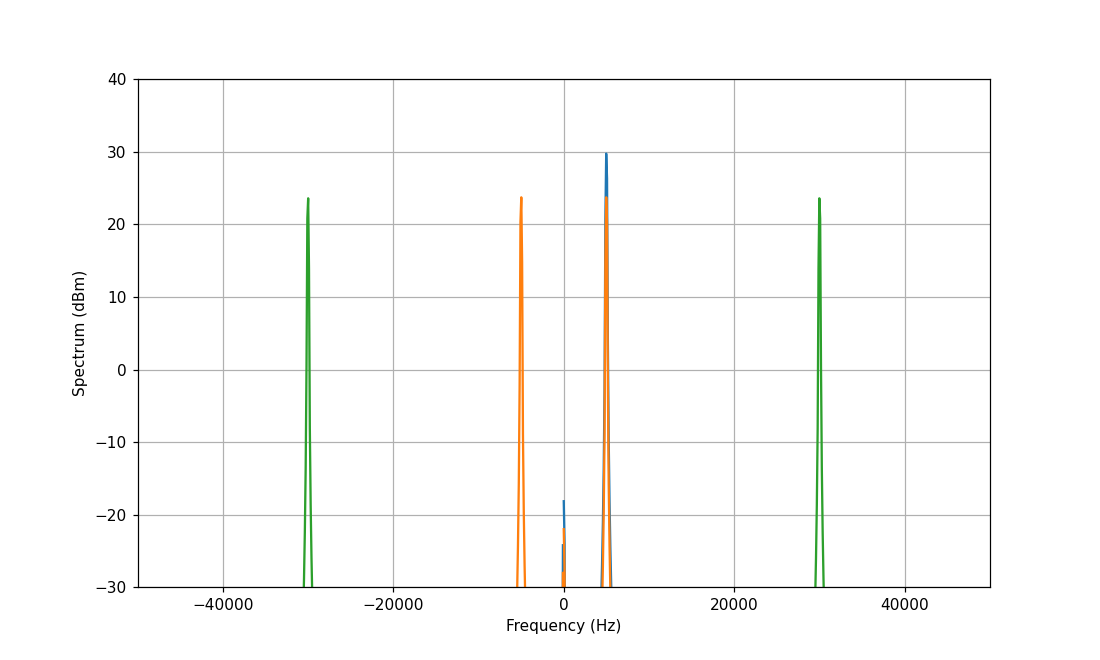

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.signal import welch, hilbert

frame_size = 5000;   # размер обрабатываемой за один раз пачки данных
fs = 100e3;          # тактовая частота (Hz)

modulation_method = "LSB"  # USB или LSB

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-fs/2, fs/2)
ax.set_ylim(-30, 40)
ax.grid(True)

# создаем три линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# постоеные осей графиков
t = np.linspace(0, frame_size/fs, frame_size) # отсчеты времени

# запуск симуляции
for frame in range(100):

    # информационное сообщение
    # частота тона: 5 kHz
    message = np.cos(2 * np.pi * 5e3 * t)
    
    # вычисление аналитического сигнала
    analytic_message = hilbert(message)
    
    # комплексный несущий сигнал
    # частота несущей: 35 kHz
    carrier = np.exp(1j * 2 * np.pi * 35e3 * t)
    
    # однополосная модуляция
    if modulation_method == "USB":
        ssb_am_signal = np.real(analytic_message * carrier)
    else:
        ssb_am_signal = np.real(np.conj(analytic_message) * carrier)

    # посторение спектрограмм
    signals = analytic_message, message, ssb_am_signal
    
    for i in range(3):
        f, spectrum = welch(signals[i], fs, return_onesided=False, scaling='spectrum', nperseg=1024) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)

На графике представлен спектр информационного сигнала (оранжевый) и спектр аналитического сигнала (синий). В зависимости от вида модуляции (USB или LSB) аналитеческий сигнал будет располагаться только на положительных или только на отрицательных частотах. Также можно увидеть, что модулированный сигнал состоит из двух дельта-функций, что совпадает с предыдущими результатами, полученными с помощью полосового фильтра.

## 4. Модуляция несколькими тонами

Разобравшись с однотональной модуляцией, легко распространить результаты на случай модуляции несколькими тонами. Пусть информационное сообщение представляет из себя сумму гармонических сигналов:

$m\left(t\right)=\sum_{i=1}^N A_i \cos \left(2\pi f_i t\right)$,

Рассмотрим, что происходит в частотной области. В случае обычной DSB модуляции сигнал на несущей частоте примет следующий вид: 

$$s_{\textrm{am}} \left(t\right)=\sum_{i=1}^N A_i \cos \left(2\pi f_i t\right)\cdot A_c \cos \left(2\pi f_c t\right)=\frac{A_c }{2}\sum_{i=1}^N A_i \left\lbrack \cos \left(2\pi \left(f_i +f_c \right)t\right)+\cos \left(2\pi \left(f_i -f_c \right)t\right)\right\rbrack.$$

То есть, после модуляции каждому тону будут соответстовать две гармоники на частотах $f_i +f_c$ и $f_i -f_c$. Как упоминалось ранее, наличие двух тонов приводит к увеличению спетра в два раза. С помощью предсталенных выше схем SSB передатчиков можно удалить верхниюю или нижнюю половину спектра. Построим спектры сигналов для случая модуляции тремя тонами.

<IPython.core.display.Javascript object>


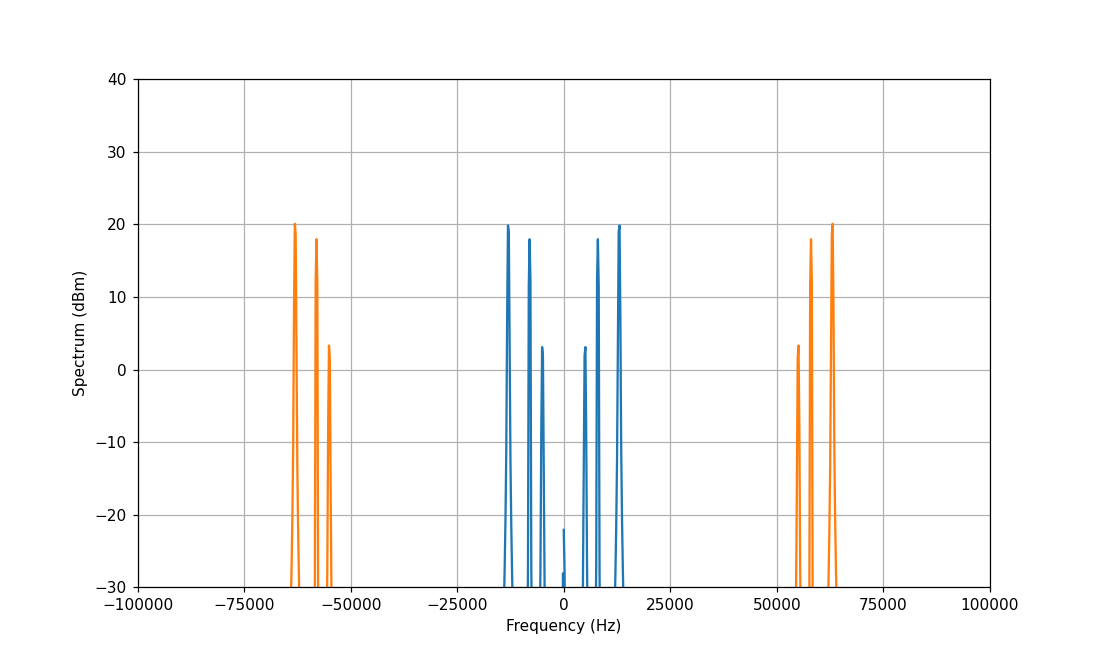

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.signal import welch, hilbert

frame_size = 5000;   # размер обрабатываемой за один раз пачки данных
fs = 200e3;          # тактовая частота (Hz)

modulation_method = "USB"  # USB или LSB

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-fs/2, fs/2)
ax.set_ylim(-30, 40)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# отсчеты времени
t = np.linspace(0, frame_size/fs, frame_size) 

# запуск симуляции
for frame in range(100):
    
    # информационное сообщение
    # частота тонов: 5, 8 и 13 kHz
    # амплитуды тонов: 0.1, 0.5 и 0.7
    message = 0.1 * np.cos(2 * np.pi * 5e3 * t)
    message += 0.5 * np.cos(2 * np.pi * 8e3 * t)
    message += 0.7 * np.cos(2 * np.pi * 13e3 * t)
    
    # вычисление аналитического сигнала
    analytic_message = hilbert(message)
    
    # комплексный несущий сигнал
    # частота несущей: 50 kHz
    carrier = np.exp(1j * 2 * np.pi * 50e3 * t)
    
    # однополосная модуляция
    if modulation_method == "USB":
        ssb_am_signal = np.real(analytic_message * carrier)
    else:
        ssb_am_signal = np.real(np.conj(analytic_message) * carrier)

    # посторение спектрограмм
    signals = message, ssb_am_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], fs, return_onesided=False, scaling='spectrum', nperseg=1024) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
        
    # обновляем отсчеты времени
    t = t + frame_size/fs 
   
    # задержка в 0.05 секунды для лучшей визуализации
    time.sleep(0.05)

Можно увидеть, что спектр модулированного сигнала (оранжевый) в зависимости от вида модуляции соответсвует верхней или нижней половине спектра информационного сообщения (синий).

## 5. Модуляция звуковым сигналом
Рассмотрим, как будет выглядеть спектр сигнала после модуляции, если
информационное сообщение является аудиосигналом. В файле
Audio\_Source.wav записано звуковое сообщение с частотой дискретизации
44.1 kHz. Частота несущей будет равна 60 kHz. Чтобы избежать наложения
спектров, выберем итоговую частоту дискретизации модулированного сигнала
в 5 раз больше частоты аудиосигнала, то есть 5 \* 44.1 kHz. Это
потребует провести интерполяцию для увеличения частоты дискретизации
информационного сообщения.


<IPython.core.display.Javascript object>


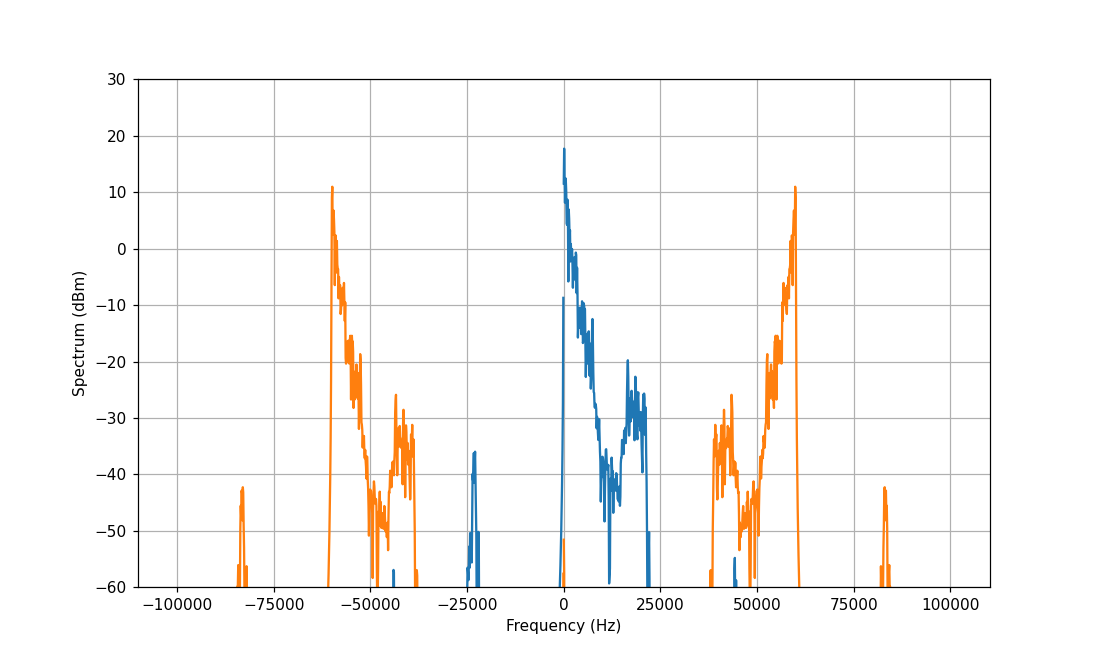

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time, wave

from scipy.signal import welch, resample_poly, hilbert

audio_frame_size = 1000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 100      # число обрабатываемых пачек данных
rate_ratio = 5           # коэффициент увеличения частоты дискретизации

modulation_method = "LSB"  # USB или LSB

# открываем файл и получаем частоту дискретизации
audio_file = wave.open('../../wav/Audio_Source.wav')
audio_fs = audio_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
signal_fs = audio_fs * rate_ratio
signal_frame_size = audio_frame_size * rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-60, 30)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

# отсчеты времени
t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

# запуск симуляции
for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    audio_data = audio_file.readframes(audio_frame_size)    # считываем отсчеты
    audio_data = np.frombuffer(audio_data, dtype=np.int16)  # преобразуем тип данных из byte в int16
    audio_data = np.reshape(audio_data, (-1, 2))            # разделяем отсчеты для правого и левого канала
    audio_data = audio_data / 2**15                         # нормируем отсчеты к единице
       
    # вычисление аналитического сигнала
    analytic_data = hilbert(audio_data[:,0])    
        
    # выделяем один канал и увеличиваем частоту дискретизации
    upsampled_data = resample_poly(analytic_data, rate_ratio, 1)
    
    # комплексный несущий сигнал
    # частота несущей: 60 kHz
    carrier = np.exp(1j * 2 * np.pi * 60e3 * t)
    
    # однополосная модуляция
    if modulation_method == "USB":
        ssb_am_signal = np.real(upsampled_data * carrier)
    else:
        ssb_am_signal = np.real(np.conj(upsampled_data) * carrier)

    # посторение спектрограмм
    signals = upsampled_data, ssb_am_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=2048) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                           # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)


Можно увидеть, что с помощью преобразования Гильберта одна из половин спектра удаляется не полностью. На спектре SSB сигнала (оранжевый) видны остатки подавленной половины.  Эти оставшиеся компоненты спектра могут влиять на соседние каналы связи. В нашем примере, амплитуда подавленых спектральных компонентов отличается от сигнала почти на 40-60 дБ. В зависимости от требований к передатчику этого может быть достаточно, а может быть и нет.

## 7. Однотональная модуляция с использованием сдвига спектра и низкочастотного фильтра

Одним из недостатков метода однополосной модуляции с использованием полосового фильтра, является необходимость проводить фильтрацию на повышенной частоте дискретизации. Этого можно избежать, если провести фильтрация до переноса сигнала на частоту несущей. Такой метод однополосной модуляции иногда назавают третьим методом (third method).

Рассмотрим необходимые преобразования. С помощью умножения на комплексную экспоненту нужно сдвинуть сигнал так, чтобы середина спектра будущего однополосного сигнала оказалась на нулевой частоте. Спектр при этом будет несимметричным, а сигнал станет комплексным. После такого переноса с помощью низкочастотного фильтра можно удалить одну половину спектра, а оставшуюся часть перенести на несущую частоту. 

Схема приемного устройства при этом будет иметь вид:

<img src="../../images/SSB_SC_Transmitter_6.png" width=500/>

Ниже представлен скрипт для получения спектра однополосного сигнала при модуляции аудиосообщением. С помощью переменной ModulationMethod можно выбрать, какой сигнал будет сформирован: USB или LSB. Считая, что полоса аудиосигнала равна 22 kHz, перед низкочастотной фильтрацией сообщение должно быть сдвинуто на -11 kHz для USB, и на 11 kHz для LSB. 

Чтобы сдвинуть сигнал на частоту несущей, после низкочастотной фильтрации его необходимо сдвинуть обратно на 11 kHz. Это можно сделать сразу во время переноса на несущую, умножая сигнал на комплексную экспоненту, частота которой равна сумме частоты несущей и частоты сдвига.

<IPython.core.display.Javascript object>


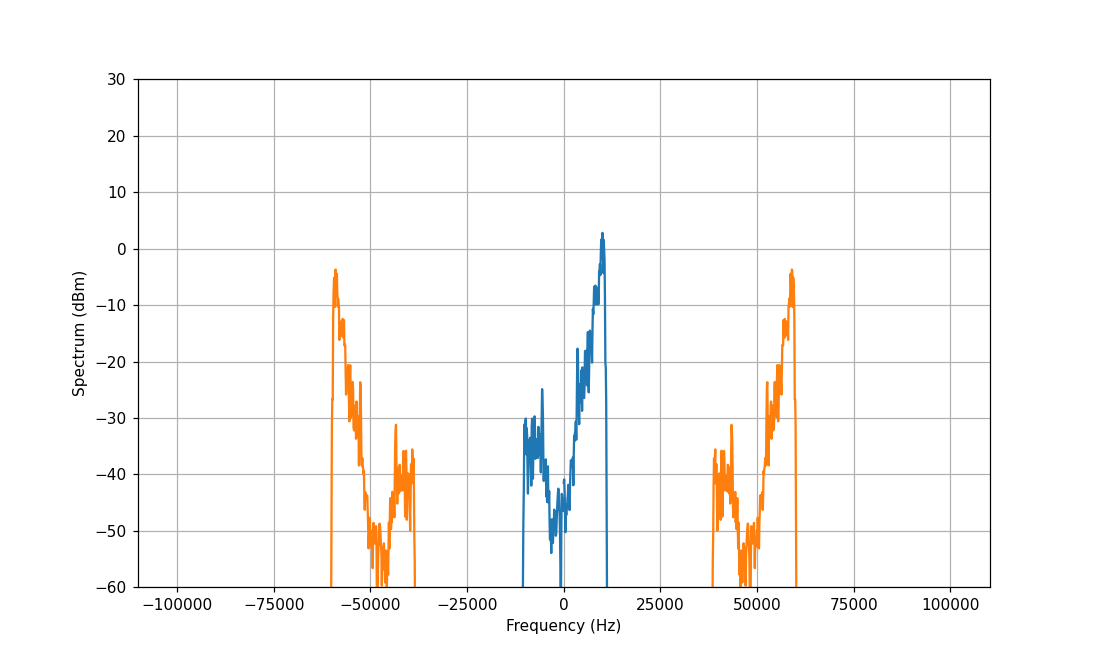

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time, wave

from scipy.signal import welch, resample_poly, firls, lfilter

audio_frame_size = 1000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 100      # число обрабатываемых пачек данных
rate_ratio = 5           # коэффициент увеличения частоты дискретизации

modulation_method = "LSB"  # USB или LSB

# открываем файл и получаем частоту дискретизации
audio_file = wave.open('../../wav/Audio_Source.wav')
audio_fs = audio_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
signal_fs = audio_fs * rate_ratio
signal_frame_size = audio_frame_size * rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-60, 30)
ax.grid(True)

# получение коэффициентов ФНЧ
H = firls(175, (0, 10e3, 11e3, audio_fs/2), (1, 1, 0, 0), fs=audio_fs)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

# отсчеты времени для двух частот дискретизации
t_a = np.linspace(0, audio_frame_size/audio_fs, audio_frame_size) 
t_s = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

FIR_tap_values = np.zeros(len(H) - 1) # внутреннее состояние ФНЧ

# запуск симуляции
for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    audio_data = audio_file.readframes(audio_frame_size)    # считываем отсчеты
    audio_data = np.frombuffer(audio_data, dtype=np.int16)  # преобразуем тип данных из byte в int16
    audio_data = np.reshape(audio_data, (-1, 2))            # разделяем отсчеты для правого и левого канала
    audio_data = audio_data / 2**15                         # нормируем отсчеты к единице
       
    # формирование тона для переноса сперктра
    # частота: 11 kHz
    mixer_wave = np.exp(1j * 2 * np.pi * 11e3 * t_a)
    
    # сдвиг сообщения по частоте
    if modulation_method == "LSB":
        mixer_data = audio_data[:,0] * mixer_wave
    else:
        mixer_data = audio_data[:,0] * np.conj(mixer_wave)
    
    # фильтрация для удаления второй полосы    
    ssb_data, FIR_tap_values = lfilter(H, 1.0, mixer_data, zi=FIR_tap_values)
        
    # увеличиваем частоту дискретизации
    upsampled_data = resample_poly(ssb_data, rate_ratio, 1)
    
    # формирование несущей
    if modulation_method == "USB":
        carrier = np.exp(1j * 2 * np.pi * (60e3 + 11e3 ) * t_s)
    else:
        carrier = np.exp(1j * 2 * np.pi * (60e3 - 11e3 ) * t_s)
        
    # перенос на частоту несущей
    ssb_am_signal = np.real(upsampled_data * carrier)
    
    # посторение спектрограмм
    signals = upsampled_data, ssb_am_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=2048) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                           # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t_a = t_a + audio_frame_size/audio_fs 
    t_s = t_s + signal_frame_size/signal_fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)

Синим цветом на графике представлен спектр сообщения после низкочастотной фильтрации, а оранжевым - спектр модулированного сигнала. Можно увидеть, что получены те же результаты, что и при использовании полосового фильтра и преобразования Гильберта.

## 8. Преимущества и недостатки SSB-SC
Преимущества:
- уменьшение вдвое ширины спектра модулированного сигнала;
- модуляция эффективна с точки зрения мощности, так как несущая не передается.

Недостатки:
- возможна только когерентная демодуляция.

## Литература:
- B. P. Lathi Modern Digital and Analog Communication Systems 
- R. Stewart, K. Barlee, D. Atkinson, L. Crockett Software Defined Radio using MATLAB® & Simulink and the RTL-SDR